<a href="https://colab.research.google.com/github/Niger49/CSE3210_DSP/blob/main/ASSIGNMENT_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ANSWER TO THE QUESTION NO 1**

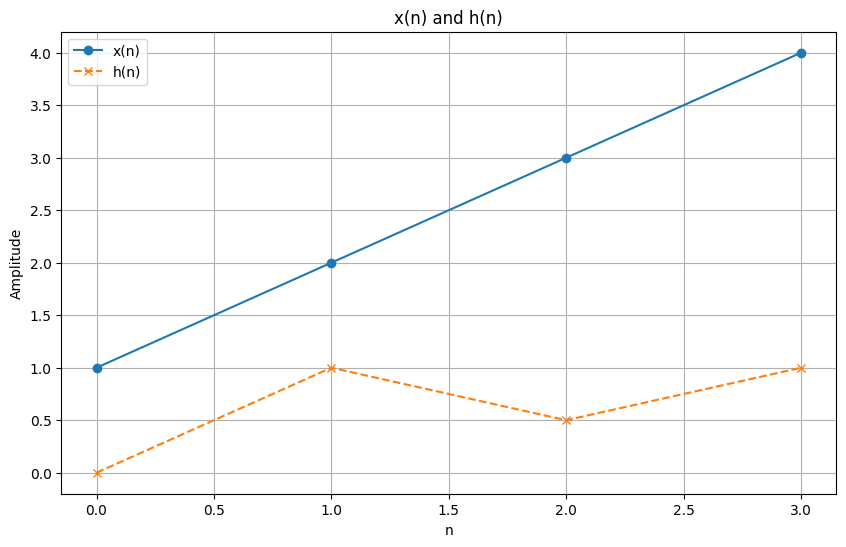

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = [1, 2, 3, 4]
h = [0, 1, 0.5, 1]

plt.figure(figsize=(10, 6))
plt.plot(x, label='x(n)', marker='o', linestyle='-')
plt.plot(h, label='h(n)', marker='x', linestyle='--')
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.title('x(n) and h(n)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#linear convolution
def linear_conv(x, h):
    len_x = len(x)
    len_h = len(h)
    len_output = len_x + len_h - 1
    y = [0] * len_output
    for n in range(len_output):
        for k in range(len_x):
            if (n - k) >= 0 and (n - k) < len_h:
                y[n] += x[k] * h[n - k]
    return y

#Direct formula implementation
y_linear_direct = linear_conv(x, h)

#using -> numpy.convolve()
y_linear_numpy = np.convolve(x, h)

print("Linear Convolution (Direct):", y_linear_direct)
print("Linear Convolution (NumPy):", y_linear_numpy)

Linear Convolution (Direct): [0, 1, 2.5, 5.0, 7.5, 5.0, 4]
Linear Convolution (NumPy): [0.  1.  2.5 5.  7.5 5.  4. ]


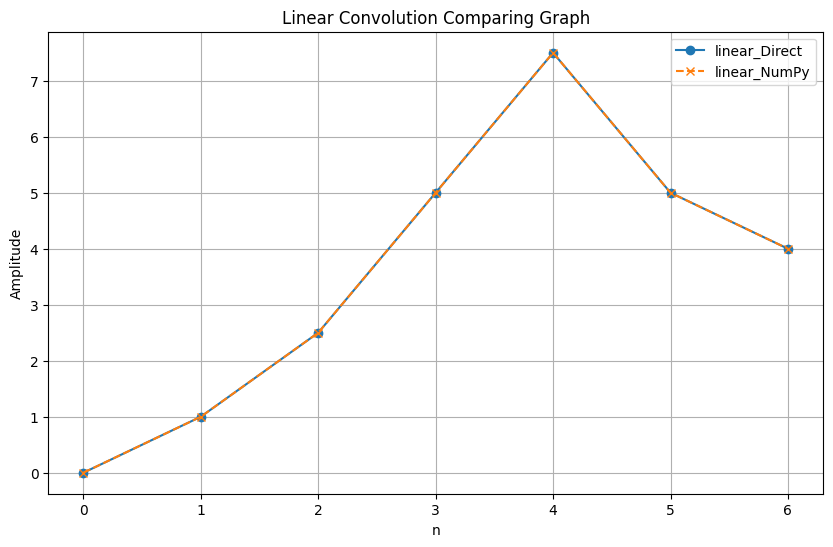

In [ ]:
#comparing results through graph

plt.figure(figsize=(10, 6))
plt.plot(y_linear_direct, label='linear_Direct', marker='o', linestyle='-')
plt.plot(y_linear_numpy, label='linear_NumPy', marker='x', linestyle='--')
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.title('Linear Convolution Comparing Graph')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#Circular convolution
x = [1, 2, 3, 4]
h = [0, 1, 0.5, 1]

#By direct formula implementation
def circular_conv(x, h):
    len_output = max(len(x), len(h))
    x_padded = x + [0] * (len_output - len(x))
    h_padded = h + [0] * (len_output - len(h))

    print("x_padded:", x_padded)
    print("h_padded:", h_padded)

    y = [0] * len_output

    for n in range(len_output):
        for k in range(len_output):
            y[n] += x_padded[k] * h_padded[(n - k) % len_output]
    return y

y_circ_direct = circular_conv(x, h)

print("Circular Convolution by direct formula implementation:", y_circ_direct)

x_padded: [1, 2, 3, 4]
h_padded: [0, 1, 0.5, 1]
Circular Convolution by direct formula implementation: [7.5, 6.0, 6.5, 5.0]


In [ ]:
#The Discrete Fourier Transform (DFT) method via numpy.fft.fft().

def circular_conv_dft(x, h):
    len_output = max(len(x), len(h))
    x_padded = x + [0] * (len_output - len(x))
    h_padded = h + [0] * (len_output - len(h))

    print("x_padded:", x_padded)
    print("h_padded:", h_padded)

    x_dft = np.fft.fft(x_padded)
    h_dft = np.fft.fft(h_padded)
    Y = x_dft * h_dft
    y = np.real(np.fft.ifft(Y))
    return y

y_circ_dft = circular_conv_dft(x, h)

print("Circular Convolution by DFT method:", y_circ_dft)

x_padded: [1, 2, 3, 4]
h_padded: [0, 1, 0.5, 1]
Circular Convolution by DFT method: [7.5 6.  6.5 5. ]


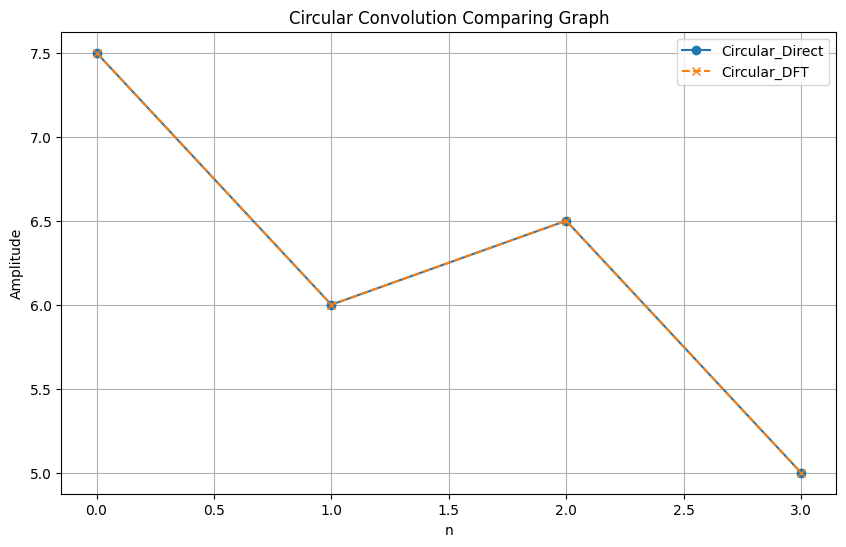

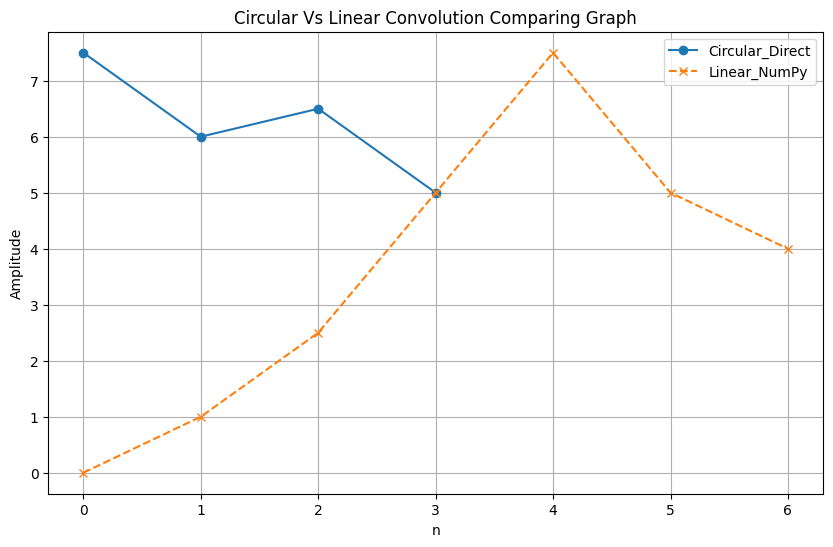

In [ ]:
#comparing results through graph

plt.figure(figsize=(10, 6))
plt.plot(y_circ_direct, label='Circular_Direct', marker='o', linestyle='-')
plt.plot(y_circ_dft, label='Circular_DFT', marker='x', linestyle='--')
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.title('Circular Convolution Comparing Graph')
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 6))
plt.plot(y_circ_direct, label='Circular_Direct', marker='o', linestyle='-')
#plt.plot(y_circ_dft, label='Circular_DFT', marker='x', linestyle='--')
#plt.plot(y_linear_direct, label='Linear_Direct', marker='o', linestyle='-')
plt.plot(y_linear_numpy, label='Linear_NumPy', marker='x', linestyle='--')
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.title('Circular Vs Linear Convolution Comparing Graph')
plt.legend()
plt.grid(True)
plt.show()


**ANSWER TO THE QUESTION NO 2**

In [ ]:
import numpy as np

x = [3, 1, 0, 2, 5]
y = [1, 2, 3, 4, 5]


In [ ]:
#auto-correlation of x[n]

#by Direct formula implementation
def auto_corr(x):
    len_x = len(x)
    acorr_rx = [0] * (2 * len_x - 1)

    for shift in range(-len_x + 1, len_x):
        idx = len_x - 1 + shift

        for n in range(len_x):
            if 0 <= n - shift < len_x:
                acorr_rx [idx] += x[n] * x[n - shift]

    return acorr_rx

rxx_direct = auto_corr(x)

print("Auto-correlation of x (Direct):", rxx_direct)

#by numpy.correlate() with mode ’full’.
rxx_numpy = np.correlate(x, x, mode='full')
print("Auto-correlation of x (NumPy):", rxx_numpy)

Auto-correlation of x (Direct): [15, 11, 2, 13, 39, 13, 2, 11, 15]
Auto-correlation of x (NumPy): [15 11  2 13 39 13  2 11 15]


In [ ]:
# Computing cross-correlation between x[n] and y[n].
ryx_cross = np.correlate(y, x, mode='full')
print("Cross-correlation of (y, x):", ryx_cross)

Cross-correlation of (y, x): [ 5 12 19 27 38 19 13 17 15]


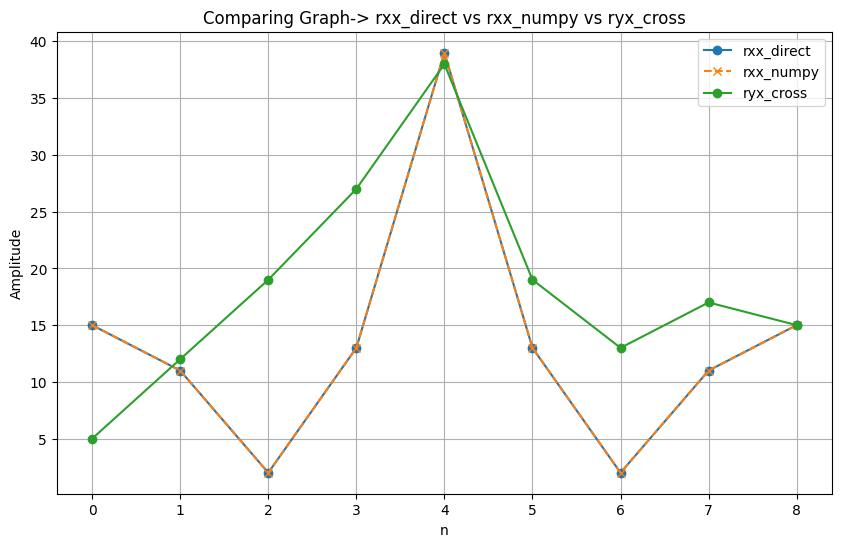

In [ ]:
#comparing results through graph

plt.figure(figsize=(10, 6))
plt.plot(rxx_direct, label='rxx_direct', marker='o', linestyle='-')
plt.plot(rxx_numpy, label='rxx_numpy', marker='x', linestyle='--')
plt.plot(ryx_cross, label='ryx_cross', marker='o', linestyle='-')
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.title('Comparing Graph-> rxx_direct vs rxx_numpy vs ryx_cross')
plt.legend()
plt.grid(True)
plt.show()

**ANSWER TO THE QUESTION NO 3**

In [ ]:
!!pip install --upgrade sympy

['Requirement already satisfied: sympy in /usr/local/lib/python3.11/dist-packages (1.13.3)',
 'Requirement already satisfied: mpmath<1.4,>=1.1.0 in /usr/local/lib/python3.11/dist-packages (from sympy) (1.3.0)']

In [ ]:
import numpy as np
from sympy import symbols, Heaviside, oo, simplify, apart

#Z-transform of x[n] symbolically using sympy
a = 0.5
z, n = symbols('z n')
u = Heaviside(n)
x = (a)**n * u

z_transform_X = 1 / (1 - (a / z))
z_transform_X = simplify(z_transform_X)

print("Z-Transform:", z_transform_X)
roc_boundary = a
print(f"Estimated ROC: |Z| > {roc_boundary}")

# the inverse Z-transform by Partial fraction expansion
X_simplified = z_transform_X.simplify()
partial = apart(X_simplified, z)
inverse_terms = partial
print("Inverse Z-Transform by Partial fraction expansion:", inverse_terms)


# Verifying the results numerically.
n_vals = np.arange(0, 10)
x_n = 0.5**n_vals * (n_vals >= 0)
print("Numerical signal:", x_n)


Z-Transform: z/(z - 0.5)
Estimated ROC: |Z| > 0.5
Inverse Z-Transform by Partial fraction expansion: 1.0 + 0.5/(1.0*z - 0.5)
Numerical signal: [1.         0.5        0.25       0.125      0.0625     0.03125
 0.015625   0.0078125  0.00390625 0.00195312]


**ANSWER TO THE QUESTION NO 4**

In [ ]:
import numpy as np
from scipy import signal

#Generating an input signal x[n] = δ[n] (unit impulse)
x = [1] + [0] * 10
print("Input Signal\n", x)


# Computing the output y[n] for n = 0 to n = 10 ->

#By using direct iterative computation
def direct_eq(x):
    y = [0] * len(x)
    for n in range(len(x)):
        if n == 0:
            y[n] = x[n]
        else:
            y[n] = 0.5 * y[n-1] + x[n] + 2 * x[n-1]
    return y

y_direct = direct_eq(x)
print("Output using direct iterative computation :\n", y_direct)

#by using scipy.signal.lfilter()
co_eff_x = [1, 2]
co_eff_y = [1, -0.5]
y_lfilter = signal.lfilter(co_eff_x, co_eff_y, x)
print("Output using scipy.signal.lfilter():\n", y_lfilter)

Input Signal
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Output using direct iterative computation :
 [1, 2.5, 1.25, 0.625, 0.3125, 0.15625, 0.078125, 0.0390625, 0.01953125, 0.009765625, 0.0048828125]
Output using scipy.signal.lfilter():
 [1.         2.5        1.25       0.625      0.3125     0.15625
 0.078125   0.0390625  0.01953125 0.00976562 0.00488281]
Both match, lfilter is just faster I guess!


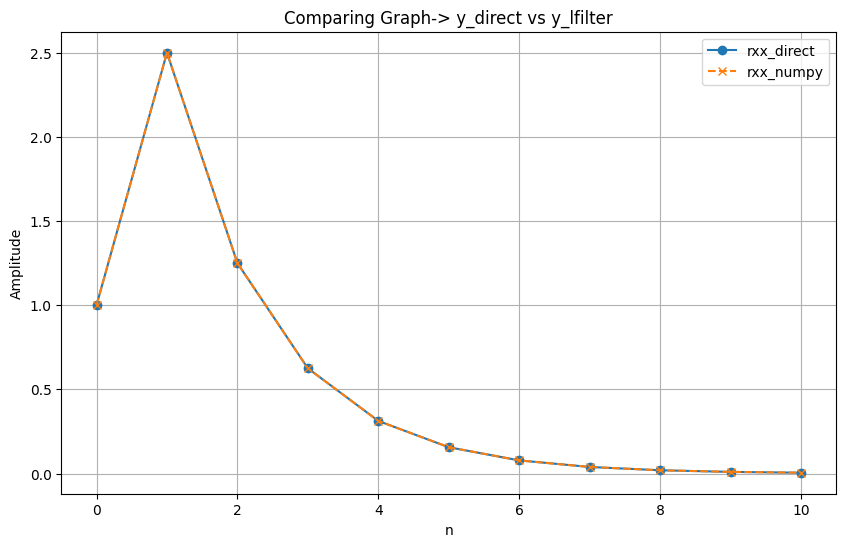

In [ ]:
#comparing results through graph
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_direct, label='rxx_direct', marker='o', linestyle='-')
plt.plot(y_lfilter, label='rxx_numpy', marker='x', linestyle='--')
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.title('Comparing Graph-> y_direct vs y_lfilter')
plt.legend()
plt.grid(True)
plt.show()

**ANSWER TO THE QUESTION NO 5**

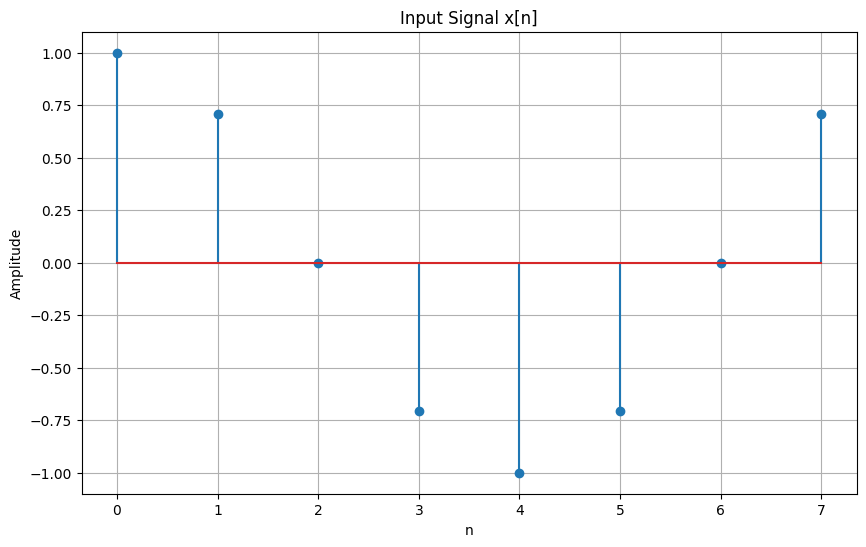

DFS Coefficients (Direct):
 [-6.93889390e-17+0.00000000e+00j  5.00000000e-01-4.16333634e-17j
 -4.19845767e-17-1.38777878e-17j  8.32667268e-17-4.16333634e-17j
  1.38777878e-17-6.12323400e-17j  2.08166817e-16-1.31838984e-16j
  1.34535513e-16-9.71445147e-17j  5.00000000e-01+5.68989300e-16j]
DFS Coefficients (FFT):
 [-4.30636606e-17+0.00000000e+00j  5.00000000e-01-5.83717456e-17j
  1.53080850e-17+0.00000000e+00j  0.00000000e+00+2.86059436e-18j
  1.24474906e-17+0.00000000e+00j  0.00000000e+00-2.86059436e-18j
  1.53080850e-17+0.00000000e+00j  5.00000000e-01+5.83717456e-17j]


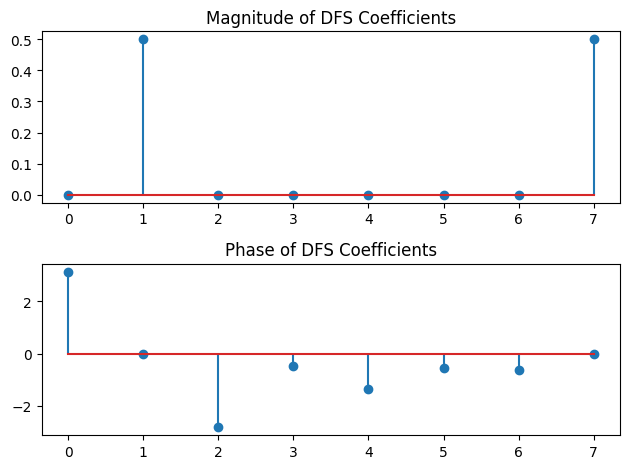


The plot shows the magnitude and phase of the DFS coefficients, where the significant frequencies are at k=1 and k=7 due to the cosine function’s periodicity.


In [ ]:
# Compute the DFS coefficients

import numpy as np
import matplotlib.pyplot as plt

N = 8
n = np.arange(N)
x = np.cos(2 * np.pi * n / N)

plt.figure(figsize=(10, 6))
plt.stem(n, x)
plt.title("Input Signal x[n]")
plt.xlabel("n")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

#By Direct formula implementation
def dfs_coeffs(x, N):
    co_effs = []
    for k in range(N):
        sum_val = 0
        for n in range(N):
            sum_val += x[n] * np.exp(-2j * np.pi * k * n / N)
        co_effs.append(sum_val / N)
    return np.array(co_effs)

coeff_direct = dfs_coeffs(x, N)
print("DFS Coefficients (Direct):\n", coeff_direct)

#by numpy.fft.fft() (for comparison)
coeff_fft = np.fft.fft(x) / N
print("DFS Coefficients (FFT):\n", coeff_fft)


magnitude = np.abs(coeff_direct)
phase = np.angle(coeff_direct)


plt.subplot(2, 1, 1)
plt.stem(range(N), magnitude)
plt.title("Magnitude of DFS Coefficients")
plt.subplot(2, 1, 2)
plt.stem(range(N), phase)
plt.title("Phase of DFS Coefficients")
plt.tight_layout()
plt.show()

#Discussing the interpretation of the frequency components
print("\nThe plot shows the magnitude and phase of the DFS coefficients, where the significant frequencies are at k=1 and k=7 due to the cosine function’s periodicity.")